In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-psaj1ee5 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Image Compression

We can also apply the DCT to compress images as well.  Here we have an $8 \times 8$ image that we will attempt to compress with DCT.  Note that the pixel values range from $\left[0, 1\right]$, but we have colored it blue and orange for added emphasis.

In [ ]:
def create_dct_basis(N):
    D = np.zeros((N, N))
    x = ((np.arange(N) + 0.5) / N) * np.pi
    for k in range(N):
        D[:,k] = np.cos(x * k)
        D[:,k] /= la.norm(D[:,k])
    return D

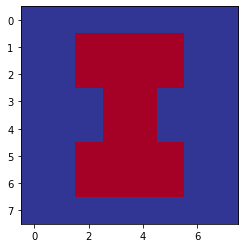

In [2]:
N = 8
block_i = np.ones((N, N))
block_i[1:-1, 3:5] = 0
block_i[1:3, 2:6] = 0
block_i[-3:-1, 2:6] = 0
plt.imshow(block_i, cmap="RdYlBu")

In [3]:
D = create_dct_basis(N)
print(D)

[[ 0.35355339  0.49039264  0.46193977  0.41573481  0.35355339  0.27778512
   0.19134172  0.09754516]
 [ 0.35355339  0.41573481  0.19134172 -0.09754516 -0.35355339 -0.49039264
  -0.46193977 -0.27778512]
 [ 0.35355339  0.27778512 -0.19134172 -0.49039264 -0.35355339  0.09754516
   0.46193977  0.41573481]
 [ 0.35355339  0.09754516 -0.46193977 -0.27778512  0.35355339  0.41573481
  -0.19134172 -0.49039264]
 [ 0.35355339 -0.09754516 -0.46193977  0.27778512  0.35355339 -0.41573481
  -0.19134172  0.49039264]
 [ 0.35355339 -0.27778512 -0.19134172  0.49039264 -0.35355339 -0.09754516
   0.46193977 -0.41573481]
 [ 0.35355339 -0.41573481  0.19134172  0.09754516 -0.35355339  0.49039264
  -0.46193977  0.27778512]
 [ 0.35355339 -0.49039264  0.46193977 -0.41573481  0.35355339 -0.27778512
   0.19134172 -0.09754516]]


How can we actually transform into the DCT basis here?  If we imagine the matrix `block_i` above as a linear transformation from and to the standard basis:
$$ {\bf I}_{\mathcal{E}, \mathcal{E}} $$
We can write the equivalent transformation from and to the DCT basis as:
$$ {\bf I}_{\mathcal{D}, \mathcal{D}} = {\bf D}^T {\bf I}_{\mathcal{E}, \mathcal{E}} {\bf D} $$

In [4]:
freq_i = D.T @ block_i @ D

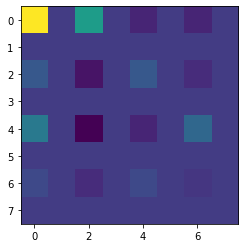

In [5]:
plt.imshow(freq_i)

In [6]:
tol = 0.5

In [7]:
comp_freq = freq_i.copy()
print(comp_freq)
i,j = comp_freq.shape
removed_elems = 0
for a in range(i):
    for b in range(j):
        if((comp_freq[a][b] < tol ) and (comp_freq[a][b] > -tol)):
            comp_freq[a][b] = 0
            removed_elems += 1

[[ 5.50000000e+00  4.98792796e-16  2.50104055e+00  8.89430608e-16
  -5.00000000e-01  1.35837358e-16 -4.94768815e-01  8.75245543e-15]
 [ 1.96261557e-16 -1.23259516e-32  1.23814431e-16  4.31408308e-32
  -3.92523115e-17  0.00000000e+00 -8.79922067e-18  3.43585902e-31]
 [ 6.53281482e-01  6.69642937e-17 -8.53553391e-01 -1.79667053e-16
   6.53281482e-01  1.69075459e-16 -3.53553391e-01 -1.24956327e-16]
 [ 9.81307787e-16  1.07852077e-31 -2.26385664e-16  6.16297582e-32
   1.17756934e-16 -8.01186857e-32 -3.36871751e-17  9.48327905e-31]
 [ 1.50000000e+00  2.84101104e-16 -1.19447758e+00  5.75471016e-17
  -5.00000000e-01 -9.39082468e-16  1.03596491e+00  9.59705696e-16]
 [ 3.53270803e-16  1.47911420e-31 -8.61546551e-16 -7.39557099e-32
  -1.17756934e-16 -4.19082356e-31  4.84323454e-16 -2.61926472e-31]
 [ 2.70598050e-01  2.75310130e-17 -3.53553391e-01 -6.36347053e-17
   2.70598050e-01  5.68014270e-17 -1.46446609e-01 -3.65791799e-17]
 [ 6.96728529e-15 -2.31111593e-33  2.33776565e-15  9.70668692e-31
   

Print this value to get an idea of the rate of compression here.

In [8]:
print(f"removed {removed_elems} / {8 ** 2} entries")

removed 55 / 64 entries


In [10]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
comp_i = la.inv(D.T) @ comp_freq @ la.inv(D)

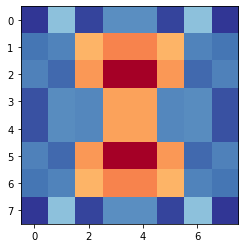

In [11]:
plt.imshow(comp_i, cmap="RdYlBu")

### Compressing Alma

This sort of image compression can be scaled up to much larger images than $8 \times 8$ using the "sectioning" or "chunking" technique discussed earlier for audio compression.  We can break an image apart into $8 \times 8$ chunks and then perform DCT compression on those.  This is in fact how the JPEG standard works.

In [11]:
alma = plt.imread("alma.jpg")[:624,:,0]
plt.figure(figsize=(20,20))
plt.imshow(alma, cmap="gray")

Note that all pixel values of the image are integers between 0 and 255:

In [12]:
alma.max()

In [13]:
alma.min()

In [14]:
alma.shape

First we create the DCT basis for the chunks:

In [15]:
N = 8
D2 = create_dct_basis(N)

In [16]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
alma_comp = np.zeros_like(alma)

for u in range(0, alma.shape[0], N):
    for v in range(0, alma.shape[1], N):
        # Get get subimages of the alma image, and store them as chunk
        chunk = alma[u:u+N, v:v+N].copy() 
        # Convert to DCT basis
        # Get the tolerance
        # Change to zero all the entries with value smaller than the tolerance
        # Convert back to standard basis
        # Store result as alma_comp


In [17]:
plt.figure(figsize=(20,20))
plt.imshow(alma_comp, cmap="gray")